# This file aims to study and inspect the data in folder `data/`

## The following data is taken from Kaggle :

- [Best Songs on Spotify for every year (2000-2023)](https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023?resource=download)
- [Top Spotify Songs in 73 Countries (Daily Updated)](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated) 

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Inspecting songs from 2000 to 2023
# /!\ this dataset is missin loudness and tempo
top_100_songs = pd.read_csv('re_data/top_100_from_2000_to_2023.csv', sep=';')

# Data Shape
print(top_100_songs.shape)

# Data head
top_100_songs.head()

(2385, 14)


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [4]:
# Get Column Names
top_100_songs_cols = top_100_songs.columns.to_list()
print(top_100_songs_cols)

['title', 'artist', 'top genre', 'year', 'bpm', 'energy', 'danceability ', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness ', 'popularity']


In [12]:
top_100_songs.columns.tolist()

['title',
 'artist',
 'top genre',
 'year',
 'bpm',
 'energy',
 'danceability ',
 'dB',
 'liveness',
 'valence',
 'duration',
 'acousticness',
 'speechiness ',
 'popularity']

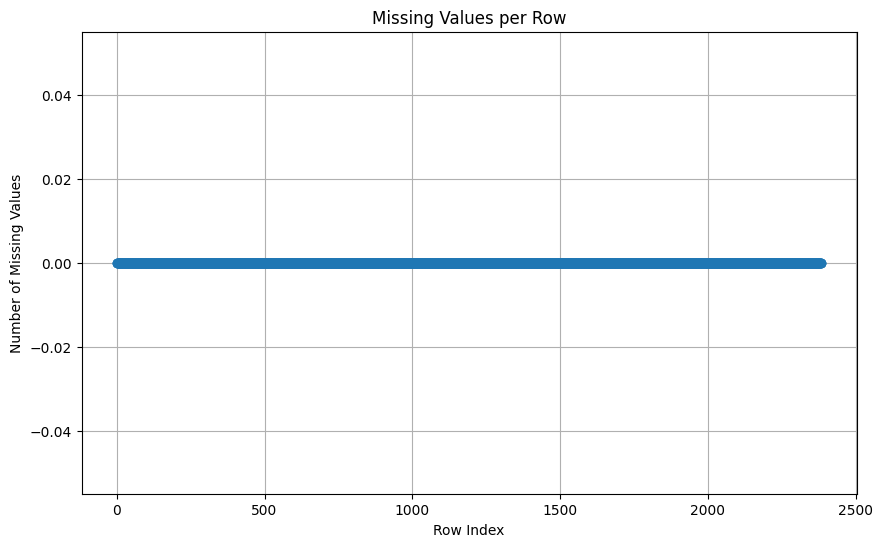

In [5]:
# function that checks for missing values in each row
def check_missing_values_and_plot(df):
    missing_values = df.isnull().sum(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(missing_values, marker='o', linestyle='-')
    plt.title('Missing Values per Row')
    plt.xlabel('Row Index')
    plt.ylabel('Number of Missing Values')
    plt.grid()
    plt.show()

check_missing_values_and_plot(top_100_songs)

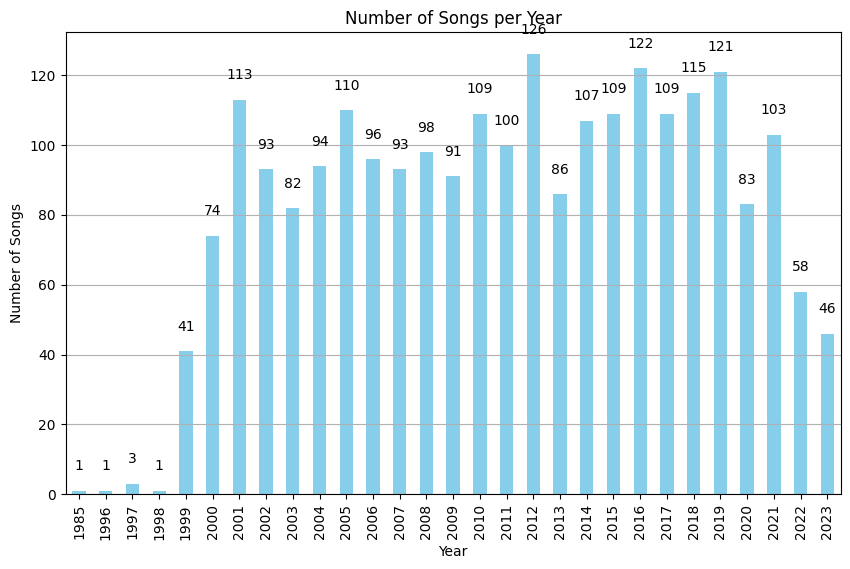

In [6]:
# plot number of songs per year with annotations
def plot_songs_per_year(df):
    songs_per_year = df['year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    ax = songs_per_year.plot(kind='bar', color='skyblue')
    plt.title('Number of Songs per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Songs')
    plt.grid(axis='y')
    
    # Add annotations on top of each bar
    for i, value in enumerate(songs_per_year):
        ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.show()

plot_songs_per_year(top_100_songs)

In [7]:
# get list of all songs for a given year and put them in a dataframe
def get_songs_by_year(df, year):
    songs_in_year = df[df['year'] == year]
    return songs_in_year[['title', 'artist', 'top genre']]

songs_2020 = get_songs_by_year(top_100_songs, 2020)

songs_2020.head(50)

,title,artist,top genre
19,Blinding Lights,The Weeknd,canadian contemporary r&b
35,Heat Waves,Glass Animals,gauze pop
56,Save Your Tears,The Weeknd,canadian contemporary r&b
63,Heather,Conan Gray,bedroom pop
84,MIDDLE OF THE NIGHT,Elley Duhé,alt z
135,telepatía,Kali Uchis,colombian pop
153,Levitating (feat. DaBaby),Dua Lipa,dance pop
191,Godzilla (feat. Juice WRLD),Eminem,detroit hip hop
202,Levitating,Dua Lipa,dance pop
211,positions,Ariana Grande,pop


In [8]:
# Inspecting top 50 songs in 73 countries (2023-2025)
top_50_songs = pd.read_csv('re_data/top_50_in_73_countries_2023_2025.csv')

# Data Shape
print(top_50_songs.shape)

# Data head
top_50_songs.head()

(2110316, 25)


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


In [9]:
# Get Column Names
top_50_songs_cols = top_50_songs.columns.to_list()
print(top_50_songs_cols)

['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement', 'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms', 'album_name', 'album_release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [ ]:
# get unique dates of snapshot_date column
unique_snapshot_dates = top_50_songs['snapshot_date'].unique()
print(unique_snapshot_dates)

['2025-06-11' '2025-06-10' '2025-06-09' '2025-06-08' '2025-06-07'
 '2025-06-06' '2025-06-05' '2025-06-04' '2025-06-03' '2025-06-02'
 '2025-06-01' '2025-05-31' '2025-05-30' '2025-05-29' '2025-05-28'
 '2025-05-27' '2025-05-26' '2025-05-25' '2025-05-24' '2025-05-23'
 '2025-05-22' '2025-05-21' '2025-05-20' '2025-05-19' '2025-05-18'
 '2025-05-17' '2025-05-16' '2025-05-15' '2025-05-14' '2025-05-13'
 '2025-05-12' '2025-05-11' '2025-05-10' '2025-05-09' '2025-05-08'
 '2025-05-07' '2025-05-06' '2025-05-05' '2025-05-04' '2025-05-03'
 '2025-05-02' '2025-05-01' '2025-04-30' '2025-04-21' '2025-04-20'
 '2025-04-19' '2025-04-18' '2025-04-17' '2025-04-16' '2025-04-15'
 '2025-04-14' '2025-04-13' '2025-04-12' '2025-04-11' '2025-04-10'
 '2025-04-09' '2025-04-08' '2025-04-07' '2025-04-06' '2025-04-05'
 '2025-04-04' '2025-04-03' '2025-04-02' '2025-04-01' '2025-03-31'
 '2025-03-30' '2025-03-29' '2025-03-28' '2025-03-27' '2025-03-26'
 '2025-03-25' '2025-03-24' '2025-03-23' '2025-03-22' '2025-03-21'
 '2025-03-